# What is the relationship between the Gross Domestic Product Per Capita and the performance of their soccer teams in international matches?

## Introduction

- Find bias
- Regression, based on country's GDP and performance
- Dataset

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Data Sources

- https://www.imf.org/external/datamapper/datasets/WEO
- https://www.rsssf.org/tablesw/wcq-records.html

In [2]:
# Loading all data needed for this project

# Loading IMF data for country GDPs from 1980 to 2027
country_gdp_capita <- read_csv("data/Country_GDP_Capita_IMF.csv")
country_gdp_capita

# Loading IMF data for country GDP Growth from 1980 to 2027
country_gdp_growth <- read_csv("data/Country_GDP_Growth_IMF.csv")
country_gdp_growth 


# Loading soccer_data
# soccer_data <- read_csv("data/SoccerDataWorldCup.csv")
# soccer_data

soccer_data <- read_csv("data/SoccerDataWorldCupTournament.csv")
soccer_data

Rows: 228 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country
dbl (48): 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,582.323,586.204,611.268,NA,NA,NA,NA,NA,NA,NA
Albania,728.359,817.734,824.542,815.529,788.332,788.801,855.724,832.245,805.046,⋯,5257.714,5345.058,5268.239,6373.300,6369.009,6591.682,6968.694,7470.082,7958.016,8469.507
Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,⋯,4118.839,3953.576,3304.865,3659.531,4151.437,4162.176,4242.401,4371.569,4523.644,4637.342
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Other advanced economies,6886.485,6930.571,6792.923,6699.744,6948.341,6861.781,8292.104,10106.092,11787.179,⋯,44142.030,43022.850,42555.028,48965.722,49580.11,51398.605,53529.015,55708.932,57993.545,60331.76
Sub-Saharan Africa,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1760.388,1727.391,1591.065,1746.345,1849.62,1933.069,2043.649,2160.323,2287.835,2421.53
World,2862.333,2876.220,2772.215,2797.085,2846.673,2920.230,3376.821,3820.734,4222.994,⋯,11489.302,11558.645,11155.514,12616.281,13396.10,13923.716,14522.871,15149.837,15810.007,16490.80


Rows: 228 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country
dbl (48): 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.2,3.9,-2.4,NA,NA,NA,NA,NA,NA,NA
Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,⋯,4.0,2.1,-3.5,8.5,4.0,2.5,3.2,3.2,3.4,3.4
Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,⋯,1.2,1.0,-5.1,3.5,4.7,2.6,2.0,1.9,1.9,1.7
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Other advanced economies,3.8,4.2,2.2,4.0,6.6,4.3,5.5,6.5,5.5,⋯,2.8,2.0,-1.7,5.3,2.8,2.3,2.6,2.3,2.3,2.2
Sub-Saharan Africa,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3.3,3.2,-1.6,4.7,3.6,3.7,4.1,4.2,4.3,4.4
World,2.1,2.0,0.7,2.7,4.6,3.7,3.6,3.9,4.7,⋯,3.6,2.8,-3.0,6.0,3.2,2.7,3.2,3.4,3.3,3.2


Rows: 76 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Team, P2+
dbl (12): FT1, FT2, G, W, D, L, G+, G-, GD, P%, P+, P3+

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Team,FT1,FT2,G,W,D,L,G+,G-,GD,P2+,P%,P+,P3+
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Brazil,20,20,104,71,16,17,221,102,119,158:50:00,0.760,185,229
Germany,18,16,106,66,20,20,224,121,103,152:60,0.717,179,218
Italy,18,14,83,45,20,18,128,77,51,110:56:00,0.663,124,155
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Haiti,1,-10,3,0,0,3,2,14,-12,0:06,0,0,0
Zaire,1,-10,3,0,0,3,0,14,-14,0:06,0,0,0
El Salvador,2,-8,6,0,0,6,1,22,-21,0:12,0,0,0


## Preliminary exploratory data analysis


In [3]:
# Tidy country_gdp data by pivoting it longer
country_capita_longer <- country_gdp_capita |>
    pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Capita",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))
country_capita_longer

country_growth_longer <- country_gdp_growth |>
        pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Growth",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))
country_growth_longer


# Combine GDP capita data and GDP Growth

country_gdp_data <- left_join(country_capita_longer, country_growth_longer, by = NULL, copy = FALSE, na_matches = "na")

country_gdp_data
    

# Find the mean gdp for each country, since the soccer data spans from 1930 to 2020, the more coverage of each year, the more accurate
country_mean_gdp_capita <- country_gdp_data |>
    group_by(Country) |>
    summarize(Mean_GDP_Capita = mean(GDP_Capita))

head(country_mean_gdp_capita)


Country,Year,GDP_Capita
<chr>,<dbl>,<dbl>
Afghanistan,2002,233.433
Afghanistan,2003,233.755
Afghanistan,2004,254.259
⋮,⋮,⋮
World,2025,15149.84
World,2026,15810.01
World,2027,16490.80


Country,Year,GDP_Growth
<chr>,<dbl>,<dbl>
Afghanistan,2003,8.7
Afghanistan,2004,0.7
Afghanistan,2005,11.8
⋮,⋮,⋮
World,2025,3.4
World,2026,3.3
World,2027,3.2


Joining, by = c("Country", "Year")


Country,Year,GDP_Capita,GDP_Growth
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2002,233.433,NA
Afghanistan,2003,233.755,8.7
Afghanistan,2004,254.259,0.7
⋮,⋮,⋮,⋮
World,2025,15149.84,3.4
World,2026,15810.01,3.3
World,2027,16490.80,3.2


Country,Mean_GDP_Capita
<chr>,<dbl>
Advanced economies,34047.0894
Afghanistan,528.8195
Africa (Region),1658.5872
Albania,2945.3290
Algeria,3145.9694
Andorra,42957.6284


In [6]:
# Attempt to combine world cup data with Country GDP and GDP Growth

soccer_data_organized <- soccer_data |>
    mutate(Country = Team) |>
    select(Country, `P%`, `P3+`)

soccer_data_organized

soccer_data_combined <- inner_join(country_mean_gdp_capita, soccer_data_organized, by = NULL, copy = FALSE, na_matches = "na")
soccer_data_combined

Country,P%,P3+
<chr>,<dbl>,<dbl>
Brazil,0.760,229
Germany,0.717,218
Italy,0.663,155
⋮,⋮,⋮
Haiti,0,0
Zaire,0,0
El Salvador,0,0


Joining, by = "Country"


Country,Mean_GDP_Capita,P%,P3+
<chr>,<dbl>,<dbl>,<dbl>
Algeria,3145.969,0.346,12
Angola,2175.099,0.333,2
Argentina,8687.311,0.643,142
⋮,⋮,⋮,⋮
Ukraine,2150.439,0.50,7
United Arab Emirates,36016.234,0.00,0
Uruguay,10148.296,0.51,72


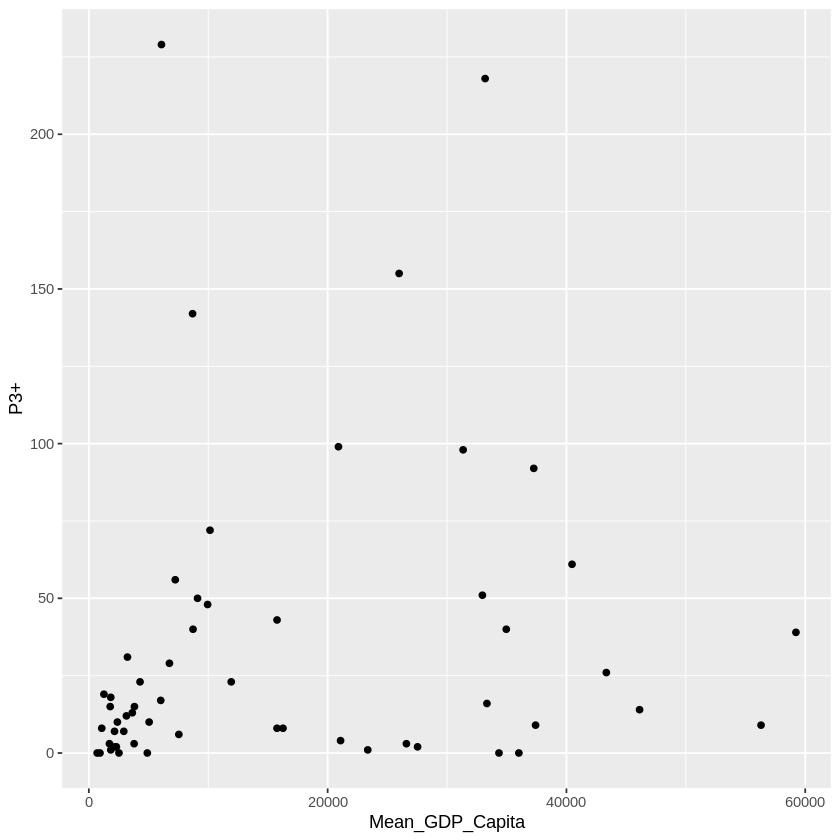

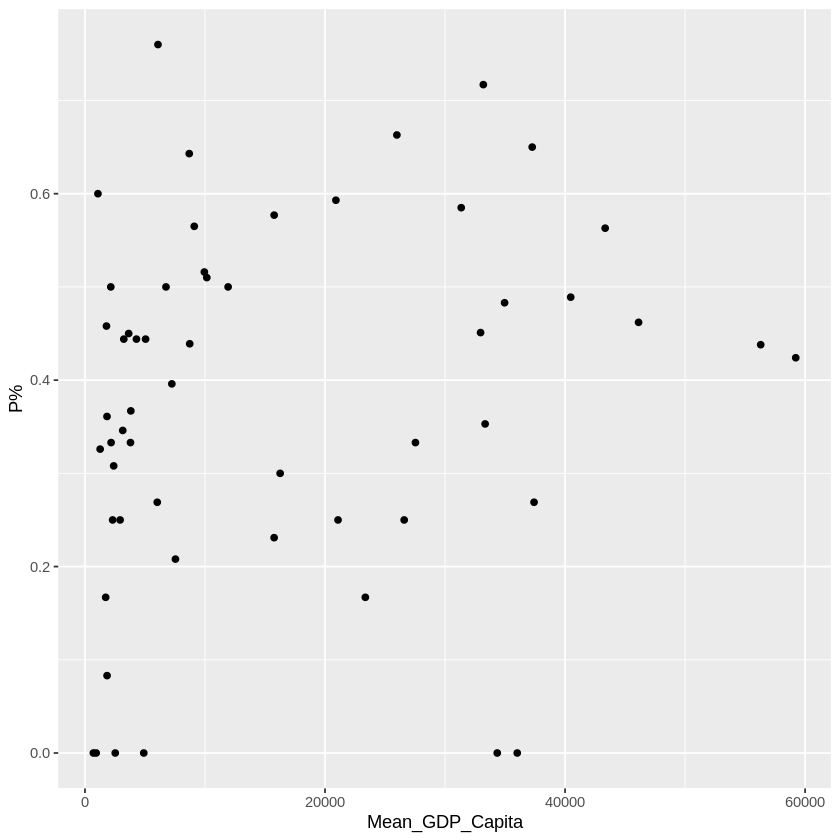

In [9]:
# Visualizing GDP and multiple world cup stats

# GDP with Success Percentage

gdp_p3_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP_Capita, y = `P3+`)) + 
    geom_point()

gdp_p3_plot

gdp_percent_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP_Capita, y = `P%`)) + 
    geom_point()

gdp_percent_plot

# 

## Methods

- Regression (Main Point)
- Classification (Maybe)
- Maybe Blocking out continents to compare leagues

## Expected outcomes and significance